In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder

In [61]:
df_heights_weights = pd.read_csv("../dados/heights-weights-dataset/heights_weights_dataset.csv", sep=";")
df_heights_weights

,Height(Inches),Weight(Pounds),State
0,65.78331,112.9925,Louisiana
1,71.51521,136.4873,Illinois
2,69.39874,153.0269,Pennsylvania
3,68.21660,142.3354,Arizona
4,67.78781,144.2971,Georgia
...,...,...,...
24995,69.50215,118.0312,Maryland
24996,64.54826,120.1932,Indiana
24997,64.69855,118.2655,Nebraska
24998,67.52918,132.2682,Ohio


In [62]:
scaler = MinMaxScaler()
df_heights_weights[df_heights_weights.columns[:2]] = scaler.fit_transform(df_heights_weights[df_heights_weights.columns[:2]])

lbl_encoder = LabelEncoder()
df_heights_weights["State_encoded"] = lbl_encoder.fit_transform(df_heights_weights["State"])
df_heights_weights


,Height(Inches),Weight(Pounds),State,State_encoded
0,0.370095,0.376472,Louisiana,17
1,0.755447,0.629351,Illinois,12
2,0.613158,0.807370,Pennsylvania,37
3,0.533683,0.692295,Arizona,2
4,0.504856,0.713410,Georgia,9
...,...,...,...,...
24995,0.620110,0.430705,Maryland,19
24996,0.287063,0.453975,Indiana,13
24997,0.297167,0.433226,Nebraska,26
24998,0.487468,0.583940,Ohio,34


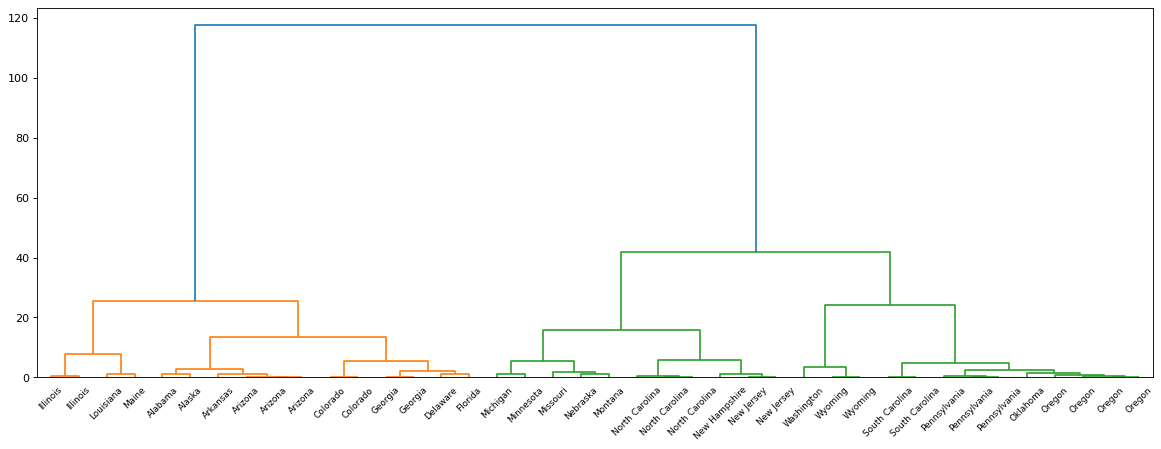

In [65]:
TAM = 40

df = df_heights_weights[["Height(Inches)", "Weight(Pounds)", "State_encoded"]]

figure(figsize=(18, 6), dpi=80)
linkage_data = linkage(df[:TAM], method='ward', metric='euclidean')
dendrogram(linkage_data, labels=df_heights_weights["State"][:TAM].values)
plt.show()